# Programming Exercise 5:
## Regularized Linear Regression and Bias vs. Variance

### 1. Regularized Linear Regression

#### 1.1 Visualizing the dataset

In [14]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

% matplotlib inline

In [79]:
data = loadmat('ex5/ex5data1.mat')

In [115]:
m = data['X'].shape[0]
m_test = data['Xtest'].shape[0]
m_val = data['Xval'].shape[0]

In [116]:
X = data['X'].reshape([m,])
y = data['y'].reshape([m,])

X_test = data['Xtest'].reshape([m_test,])
y_test = data['ytest'].reshape([m_test,])

X_val = data['Xval'].reshape([m_val,])
y_val = data['yval'].reshape([m_val,])

In [117]:
# Add intercepts:
X = np.column_stack([np.ones(m), X])
X_test = np.column_stack([np.ones(m_test), X_test])
X_val = np.column_stack([np.ones(m_val), X_val])


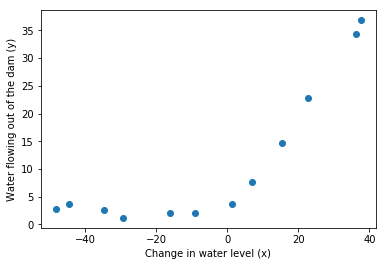

In [118]:
plt.plot(data['X'], data['y'], 'o');
plt.xlabel('Change in water level (x)'); plt.ylabel('Water flowing out of the dam (y)');

#### 1.2 Regularized linear regression cost function

In [320]:
def linearRegCostFunction(theta, X, y, Lambda):
    """ 
        LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
        regression with multiple variables
        [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, Lambda) computes the 
        cost of using theta as the parameter for linear regression to fit the 
        data points in X and y. Returns the cost in J and the gradient in grad
    """
    
    # Initialize some useful values
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    y_hat = X.dot(theta)
    
    J = np.sum((y_hat - y)**2)/(2*m) + Lambda * np.sum(theta[1:] ** 2) / (2*m)

    return J

In [249]:
theta = np.array([1, 1])

In [321]:
J = linearRegCostFunction(theta, X, y, 1)

print('Cost at theta = [1 , 1]: {} \n(this value should be about 303.993192)\n'.format(J));

Cost at theta = [1 , 1]: 303.9931922202643 
(this value should be about 303.993192)



In [322]:
def linearRegGrad(theta, X, y, Lambda):
    """ 
        LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
        regression with multiple variables
        [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, Lambda) computes the 
        cost of using theta as the parameter for linear regression to fit the 
        data points in X and y. Returns the cost in J and the gradient in grad
    """
    
    # Initialize some useful values
    m = len(y) # number of training examples
    n = len(theta)
    
    mask = np.ones(n)
    mask[0] = 0
    
    # You need to return the following variables correctly 
    y_hat = X.dot(theta)
    
    grad = (y_hat - y).dot(X) / m
    reg = Lambda * theta * mask / m
    
    grad = grad + reg
    
    return grad


In [323]:
grad = linearRegGrad(theta, X, y, 1)

In [306]:
print('Gradient at theta = [1 ; 1]:  [{0}; {1}]\n(this value should be about [-15.303016; 598.250744])\n'.format(grad[0], grad[1]));

Gradient at theta = [1 ; 1]:  [-15.303015674201186; 598.2507441727037]
(this value should be about [-15.303016; 598.250744])



#### 1.4 Fitting Linear Regression

Once you have implemented the cost and gradient correctly, the trainLinearReg function will use your cost function to train regularized linear regression.

Write Up Note: The data is non-linear, so this will not give a great fit.

In [324]:
from scipy.optimize import fmin, fmin_cg, fmin_bfgs

In [531]:
def trainLinearReg(X, y, Lambda):
    
    m, n = X.shape
    theta = np.zeros(n); 
    
    theta_opt = fmin_cg(linearRegCostFunction, x0=theta, args=(X, y, Lambda));
    #theta_opt = fmin_bfgs(linearRegCostFunction, x0=theta, args=(X, y, Lambda), fprime=linearRegGrad);
    #theta_opt = fmin(linearRegCostFunction, x0=theta, args=(X, y, Lambda));

    
    return theta_opt

In [532]:
# Train linear regression with lambda = 0
Lambda = 0;
theta_opt = trainLinearReg(X, y, Lambda)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


In [535]:
theta_opt

array([ 13.08790568,   0.36777923])

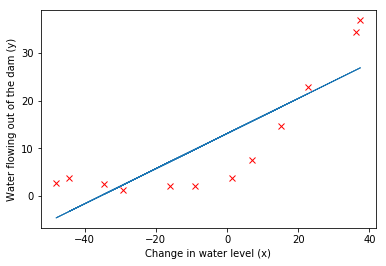

In [534]:
#  Plot fit over the data
plt.plot(X[:, 1], y, 'rx', markersize=6, lw=1.5);
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

plt.plot(X[:, 1], X.dot(theta_opt), '-', lw=1);



### 2 Bias-variance

#### 2.1 Learning curves

In [536]:
def learningCurve(X, y, Xval, yval, Lambda):
    """
        LEARNINGCURVE Generates the train and cross validation set errors needed 
        to plot a learning curve
           [error_train, error_val] = ...
               LEARNINGCURVE(X, y, Xval, yval, lambda) returns the train and
               cross validation set errors for a learning curve. In particular, 
               it returns two vectors of the same length - error_train and 
               error_val. Then, error_train(i) contains the training error for
               i examples (and similarly for error_val(i)).
        
           In this function, you will compute the train and test errors for
           dataset sizes from 1 up to m. In practice, when working with larger
           datasets, you might want to do this in larger intervals. 
    """

    # Number of training examples
    m, n = X.shape;
    error_train = []
    error_val = []
    
    for i in range(m):
        theta_opt = trainLinearReg(X[0:i+1], y[0:i+1], Lambda)
    
        error_train.append(linearRegCostFunction(theta_opt, X[0:i+1], y[0:i+1], 0))
        error_val.append(linearRegCostFunction(theta_opt, Xval, yval, 0))
    
    return error_train, error_val
    

In [537]:
error_train, error_val = learningCurve(X, y, X_val, y_val, 1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 32
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.001307
         Iterations: 2
         Function evaluations: 24
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.335017
         Iterations: 10
         Function evaluations: 64
         Gradient evaluations: 16
         Current function value: 2.881851
         Iterations: 8
         Function evaluations: 64
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 13.174273
         Iterations: 17
         Function evaluations: 112
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 19.461396
         Iterations: 17
         Function evaluations: 120
         Gradient evaluations: 30
Optimiz

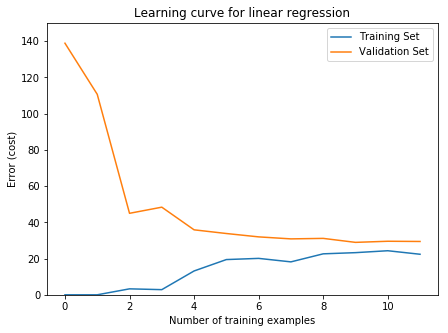

In [538]:
plt.figure(figsize=(7, 5))
plt.plot(range(m), error_train, label='Training Set');
plt.plot(range(m), error_val, label='Validation Set');
plt.xlabel('Number of training examples'); plt.ylabel('Error (cost)'); plt.legend();
plt.title('Learning curve for linear regression');
plt.ylim((0, 150));

### 3 Polynomial Regression

In [539]:
def polyFeatures(X, p):
    """
        POLYFEATURES Maps X (1D vector) into the p-th power
       [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
       maps each example into its polynomial features where
       X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
       
       Ensure X is only 1st order (no y-intercept or 0-th order terms included)
    """
    
    X = np.column_stack([X**(i+1) for i in range(p)])
            
    return X

In [540]:
polyFeatures(X[:, 1], 2)

array([[ -1.59367581e+01,   2.53980260e+02],
       [ -2.91529792e+01,   8.49896197e+02],
       [  3.61895486e+01,   1.30968343e+03],
       [  3.74921873e+01,   1.40566411e+03],
       [ -4.80588295e+01,   2.30965109e+03],
       [ -8.94145794e+00,   7.99496701e+01],
       [  1.53077929e+01,   2.34328523e+02],
       [ -3.47062658e+01,   1.20452489e+03],
       [  1.38915437e+00,   1.92974986e+00],
       [ -4.43837599e+01,   1.96991814e+03],
       [  7.01350208e+00,   4.91892115e+01],
       [  2.27627489e+01,   5.18142738e+02]])

#### 3.1 Learning Polynomial Regression

In [541]:
def featureNormalize(X, mu=None, sigma=None):
    """
        Subtract mean. Divide by standard deviation
    """
    
    if mu is None:
        mu = X.mean(axis=0)
        
    if sigma is None:
        sigma = X.std(axis=0)
    
    return (X-mu)/sigma, mu, sigma

In [542]:
p = 8;

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X[:, 1], p);
X_poly, mu, sigma = featureNormalize(X_poly);  # Normalize
X_poly = np.column_stack([np.ones(m), X_poly]);                   # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(X_test[:, 1], p)
X_poly_test = featureNormalize(X_poly_test, mu, sigma)[0]
X_poly_test = np.column_stack([np.ones(m_test), X_poly_test])

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(X_val[:, 1], p);
X_poly_val = featureNormalize(X_poly_val, mu, sigma)[0]
X_poly_val = np.column_stack([np.ones(m_val), X_poly_val])


In [543]:
theta_opt = trainLinearReg(X_poly, y, 0)

         Current function value: 0.028984
         Iterations: 1800
         Function evaluations: 37444
         Gradient evaluations: 3404


In [544]:
theta_opt

array([ 11.21748449,   9.22475662,  18.34298381,  28.00354705,
       -28.24550977, -71.90082018,   9.16584703,  58.54420374,  18.68117427])

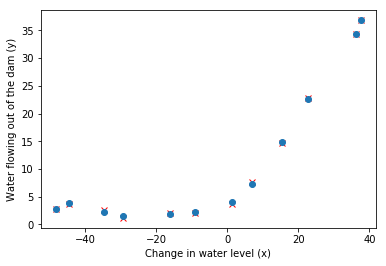

In [550]:
#  Plot fit over the data
plt.plot(X[:, 1], y, 'rx', markersize=6, lw=1.5);
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

plt.plot(X[:, 1], X_poly.dot(theta_opt), 'o', lw=1);



In [551]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, y_val, 0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 44
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 264
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 319
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 495
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 206
         Function evaluations: 4367


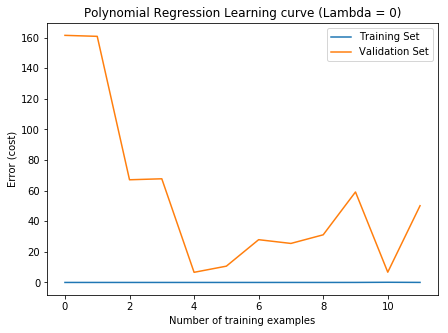

In [554]:
plt.figure(figsize=(7, 5))
plt.plot(range(m), error_train, label='Training Set');
plt.plot(range(m), error_val, label='Validation Set');
plt.xlabel('Number of training examples'); plt.ylabel('Error (cost)'); plt.legend();
plt.title('Polynomial Regression Learning curve (Lambda = {})'.format(Lambda));
plt.ylim((0, 100));

#### 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter

In [555]:
theta_opt = trainLinearReg(X_poly, y, 1)

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 40
         Function evaluations: 803
         Gradient evaluations: 73


In [556]:
theta_opt

array([ 11.21758885,   8.36723055,   5.10200939,   3.39014203,
         2.15882934,   1.62044115,   0.97247437,   1.02575142,   0.32264117])

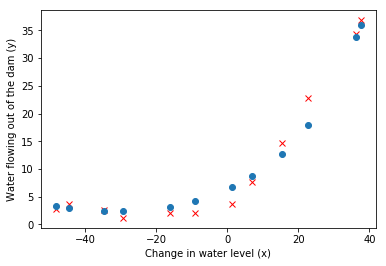

In [557]:
#  Plot fit over the data
plt.plot(X[:, 1], y, 'rx', markersize=6, lw=1.5);
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

plt.plot(X[:, 1], X_poly.dot(theta_opt), 'o', lw=1);



In [561]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, y_val, 1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 319
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 20
         Function evaluations: 385
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 31
         Function evaluations: 594
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 10
         Function evaluations: 253
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 35
         Function evaluations: 

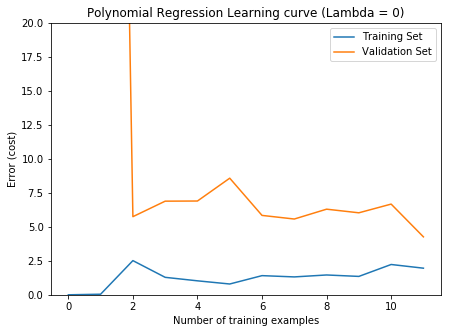

In [565]:
plt.figure(figsize=(7, 5))
plt.plot(range(m), error_train, label='Training Set');
plt.plot(range(m), error_val, label='Validation Set');
plt.xlabel('Number of training examples'); plt.ylabel('Error (cost)'); plt.legend();
plt.title('Polynomial Regression Learning curve (Lambda = {})'.format(Lambda));
plt.ylim((0,20));

#### 3.3 Selecting Lambda using a cross validation set
#### 3.4 Optional (ungraded) exercise: Computing test set error
#### 3.5 Optional (ungraded) exercise: Plotting learning curves with randomly selected examples